Traning 

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()

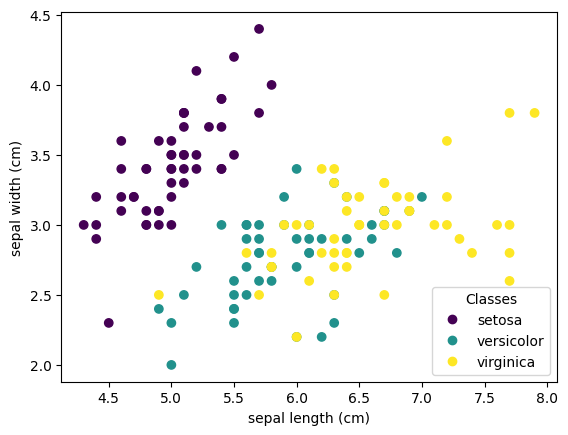

In [119]:

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

C:\Users\abdah\AppData\Local\Temp\ipykernel_28364\86930730.py:5: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k', marker='x', s=100, label='Training Data')


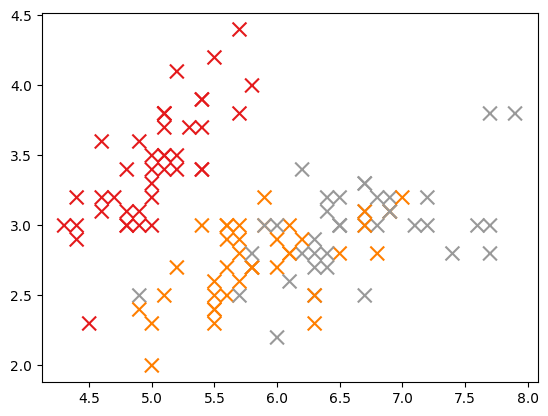

In [120]:
X = iris.data[:, :2] 
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k', marker='x', s=100, label='Training Data')





C:\Users\abdah\AppData\Local\Temp\ipykernel_28364\387341506.py:1: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Set1, edgecolor='k', marker='x', s=100, label='Training Data')


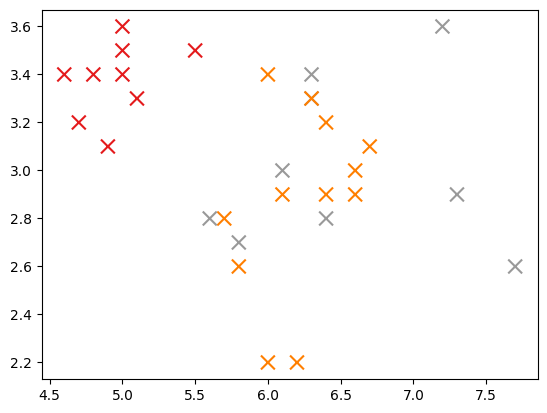

In [121]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Set1, edgecolor='k', marker='x', s=100, label='Training Data')


C:\Users\abdah\AppData\Local\Temp\ipykernel_28364\3315142439.py:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k', marker='x', s=100, label='Training Data')


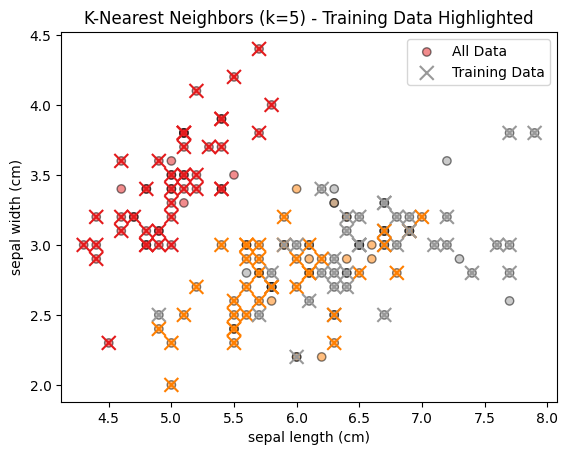

In [122]:

knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_test, y_test)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', label='All Data', alpha=0.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k', marker='x', s=100, label='Training Data')

y_pred = knn.predict(X_test)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("K-Nearest Neighbors (k=5) - Training Data Highlighted")
plt.legend()

plt.show()

C:\Users\abdah\AppData\Local\Temp\ipykernel_28364\2554114276.py:5: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter_train = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k', marker='x', s=100, label='Training Data')


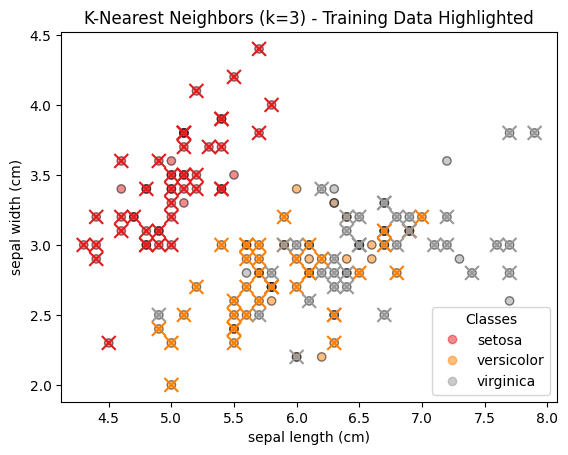

Accuracy: 0.80


In [123]:
from sklearn.metrics import accuracy_score

_, ax = plt.subplots()
scatter_all = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', alpha=0.5)
scatter_train = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k', marker='x', s=100, label='Training Data')
#scatter_test = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.Set1, edgecolor='k', marker='o', s=100, label='Test Predictions')

ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter_all.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

plt.title("K-Nearest Neighbors (k=3) - Training Data Highlighted")
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Assigment code : 


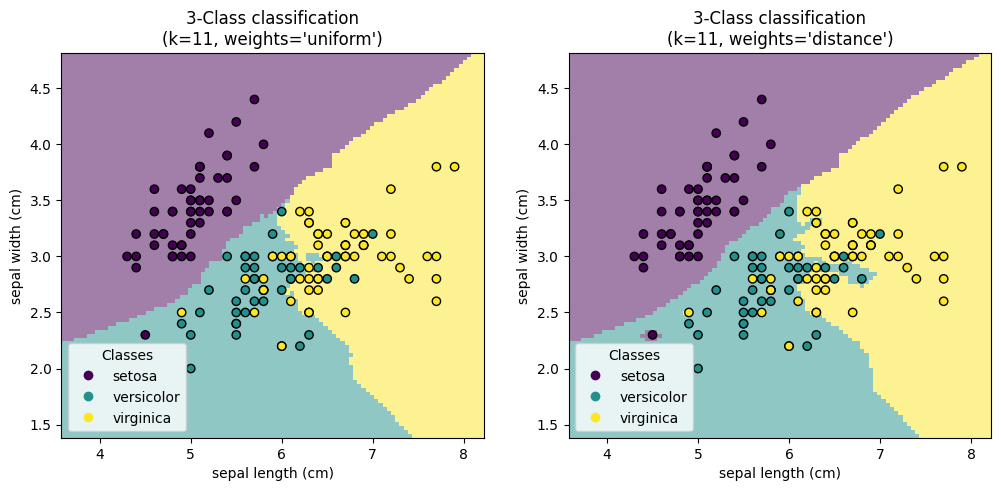

Accuracy: 0.70


In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay



iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)



clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

